In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Importing the dataset
%%bigquery df --project trans-falcon-383013
SELECT 
  *
FROM `trans-falcon-383013.project.health_expenditure`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
df

,financial_year,operating_expenditure,development_expenditure,government_health_expenditure,percentage_gdp
0,2010,3258,485,3856.7,1.2
1,2011,3489,453,4091.5,1.2
2,2012,4066,605,4837.3,1.3
3,2013,5044,723,5938.1,1.6
4,2014,5872,1147,7223.1,1.8
5,2015,7520,1413,8639.9,2.1
6,2016,8199,1618,9307.0,2.1
7,2017,8734,1465,9764.3,2.1
8,2018,8937,1490,10122.7,2.1


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a pandas DataFrame called 'df' containing the data you provided
X = df[['financial_year']] # Features
y = df['government_health_expenditure'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict the government_health_expenditure for a given financial_year
financial_year = [[2023]]
predicted_expenditure = regressor.predict(financial_year)
print("Predicted government_health_expenditure for 2023:", predicted_expenditure[0])


Mean Squared Error: 155930.11637097507
R-squared: 0.9743064052609174
Predicted government_health_expenditure for 2023: 15051.107317073038


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


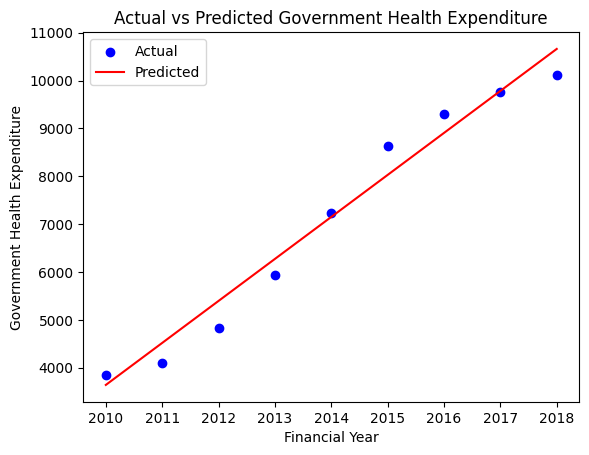

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual values
plt.scatter(X, y, color='blue', label='Actual')

# Plot the predicted line
y_pred_all = regressor.predict(X)
plt.plot(X, y_pred_all, color='red', label='Predicted')

# Add labels and a legend
plt.xlabel('Financial Year')
plt.ylabel('Government Health Expenditure')
plt.legend()
plt.title('Actual vs Predicted Government Health Expenditure')

# Show the plot
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


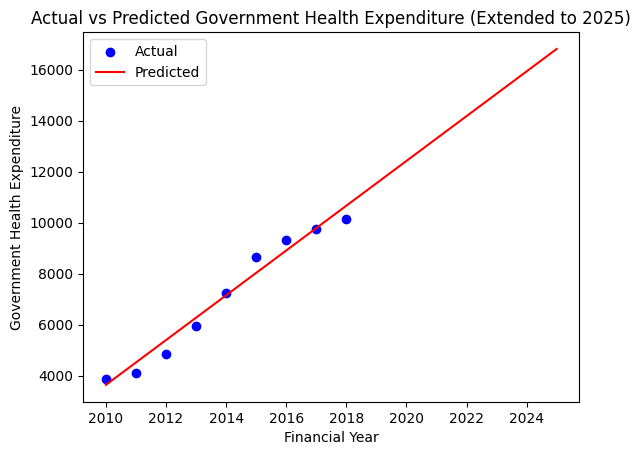

In [ ]:
import numpy as np

# Create an extended range of financial years until 2025
extended_years = np.arange(2010, 2026).reshape(-1, 1)

# Predict the government health expenditure for the extended range
y_pred_extended = regressor.predict(extended_years)

# Plot the actual values
plt.scatter(X, y, color='blue', label='Actual')

# Plot the predicted line
plt.plot(extended_years, y_pred_extended, color='red', label='Predicted')

# Add labels and a legend
plt.xlabel('Financial Year')
plt.ylabel('Government Health Expenditure')
plt.legend()
plt.title('Actual vs Predicted Government Health Expenditure (Extended to 2025)')

# Show the plot
plt.show()
